# <CENTER> ЧАСТЬ 3
# <CENTER> Кластеризация

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn import mixture
from sklearn.metrics import rand_score 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn import mixture
from sklearn import manifold
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import ensemble

In [343]:
model_df = pd.read_csv('data/total/df_corr_2.csv')
model_df.head(3)

,Регион,Child_mortality_rural,Disabled_31_60,Disabled_61_,Morbidity_onko,Morbidity_psiho,Morbidity_total,Poverty_percent,Cash_income,Socdem_pens,Socdem_trud,GRP,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Сrimes_total
0,Ямало-Ненецкий автономный округ,33.18,305609.59,566601.73,2574.06,1700.20,61160.98,7.40,53568.33,1.05,51.22,421542.81,79782683.97,2.158961e+09,154066.41,135.59,15.45,8821.73
1,Ненецкий автономный округ,3.27,290876.36,555167.32,2575.69,1717.17,61160.98,11.30,53568.33,3.30,49.90,421542.81,79782683.97,3.977413e+08,126194.95,150.58,8.89,7736.09
2,Чукотский автономный округ,8.45,290518.18,551904.77,2578.72,1912.45,61160.98,14.71,53568.33,1.85,45.25,421542.81,39395908.98,1.156411e+08,105641.32,150.58,5.58,7753.09


In [344]:
#Сделаем столбец Регион индексом
model_df["Регион"] = model_df["Регион"].str.strip()
model_df.set_index('Регион', inplace=True)

model_df.head(2)

,Child_mortality_rural,Disabled_31_60,Disabled_61_,Morbidity_onko,Morbidity_psiho,Morbidity_total,Poverty_percent,Cash_income,Socdem_pens,Socdem_trud,GRP,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Сrimes_total
Регион,,,,,,,,,,,,,,,,,
Ямало-Ненецкий автономный округ,33.18,305609.59,566601.73,2574.06,1700.20,61160.98,7.4,53568.33,1.05,51.22,421542.81,79782683.97,2.158961e+09,154066.41,135.59,15.45,8821.73
Ненецкий автономный округ,3.27,290876.36,555167.32,2575.69,1717.17,61160.98,11.3,53568.33,3.30,49.90,421542.81,79782683.97,3.977413e+08,126194.95,150.58,8.89,7736.09


Т.к. на предыдущем этапе наилучший результат показал стандартизатор StandardScaler, его и будем использовать в дальнейшем:

In [345]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
X = s_scaler.fit_transform(model_df)

### Часть 1.

### метод главных компонент `(PCA)`

Начнём с метода главных компонент (PCA). Нам известно, что для его стабильной работы данные необходимо стандартизировать/нормализовать, что мы делали ранее и выбрали наиболее подходящий вариант

Давайте для удобства обернём эти шаги по предобработке данных в pipeline.

Создадим pipeline, в котором будут следующие шаги:

- стандартизация с помощью стандартизатора StandardScaler с параметрами по умолчанию;
- метод главных компонент с двумя компонентами.

Обучим наш pipeline на наших данных, и применим к ней трансформацию.

In [346]:
pipeline = Pipeline([('pca', PCA(n_components=2))])
pipeline.fit(X)

df_pca = pipeline.transform(X)
df_pca  = pd.DataFrame(df_pca , columns = ['axis-1', 'axis-2'])
df_pca 

,axis-1,axis-2
0,3.470718,5.016904
1,1.128479,5.598848
2,0.123610,5.233909
3,5.584515,-0.452669
4,0.220649,4.282070
...,...,...
80,-3.183653,-0.408124
81,-3.645791,-1.549101
82,-3.707141,0.158197
83,-3.424918,-0.975964


In [347]:
#pipeline = Pipeline([('scaler', preprocessing.StandardScaler()), ('pca', decomposition.PCA(n_components=2))])
#pipeline.fit(model_df)
#df_pca = pipeline.transform(model_df)
#print('{} долю дисперсии исходных данных объясняет первая главная компонента'.format(round(pipeline['pca'].explained_variance_ratio_[0],2)))

Визуализировав пространство главных компонент после декомпозиции мы получим следующую картину:

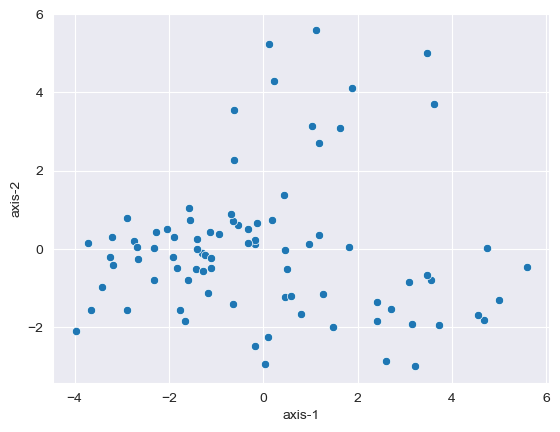

In [348]:
df_pca = pd.DataFrame(df_pca, columns = ['axis-1', 'axis-2'])
sns.scatterplot(data=df_pca, x='axis-1', y='axis-2');

### Метод `K-Means`

Как мы знаем, методу `k-means` на вход необходимо подать количество кластеров. Но дело в том, что нередко, например как в данной задаче, истинное количество кластеров попросту неизвестно. Для этого нам поможет `Elbow Method`. `Distortion score` есть квадрат расстояния от точки до ее центра кластера. Оптимальным на графике ниже количество кластеров считается, если после него `distortion score` падает практически линейно.

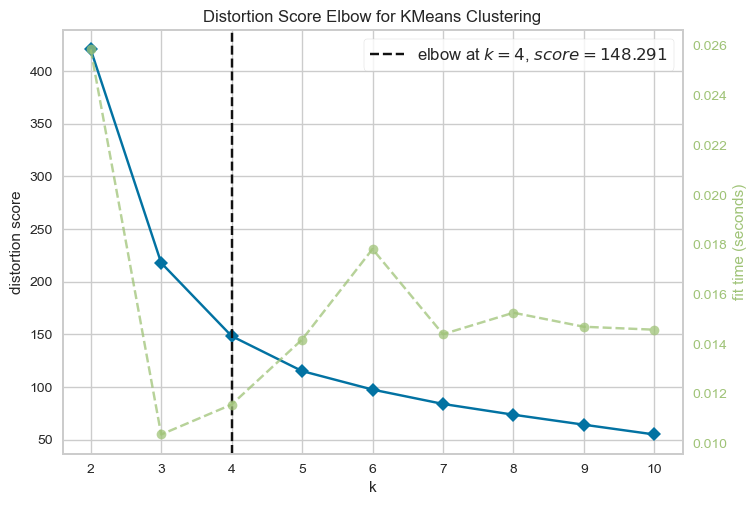

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [351]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

Gолучилось отпимальное количество кластеров 4.

Попробуем воспользоваться методом `k-means`. 

Подберем оптимальное количество кластеров для метода k-means с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно.

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.52


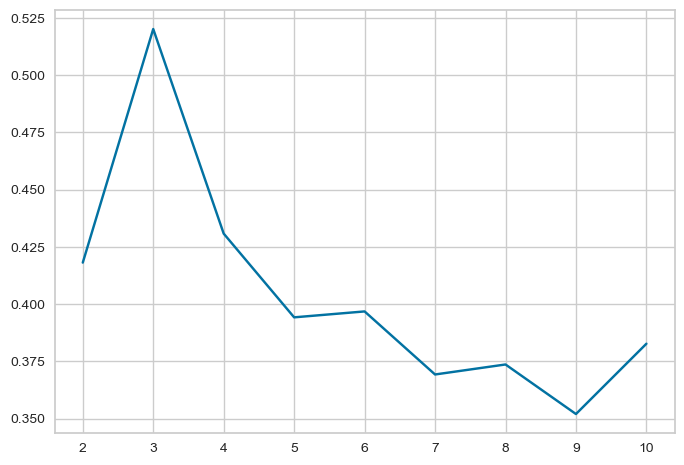

In [352]:
silhouette = []
for n_cl in range(2,11):
    kmeans = cluster.KMeans(n_cl, random_state=42)
    kmeans.fit(df_pca)
    silhouette.append(metrics.silhouette_score(df_pca, kmeans.labels_))
plt.plot(range(2,11), silhouette);
print(f'Оптимальное количество кластеров: {np.argmax(silhouette) + 2}')
print(f'Максимальное значение коэффициента силуэта: {max(silhouette):.2f}')

Подберем оптимальное количество кластеров для метода k-means с по методу локтя, перебирая возможные значения от 2 до 10 включительно

<AxesSubplot: xlabel='cluster', ylabel='inertia'>

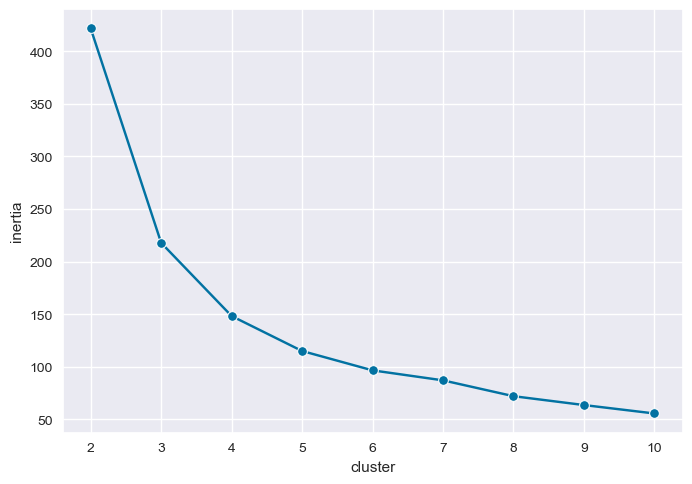

In [353]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, df_pca):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(df_pca)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df_pca

# итерируемся по разным размерам кластеров (от 2 до 10) и сохраним значение инерции для каждого кластера
for cluster_num in range(2, 11):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, df_pca))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

Тут отптимальный вариант это 4 кластера.

### `EM`-алгоритм

Теперь возьмём EM-алгоритм.

Подберите оптимальное количество кластеров для EM-алгоритма (GaussianMixture) с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. В качестве значения параметра random_state возьмем число 42. Остальные параметры по умолчанию.

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.51


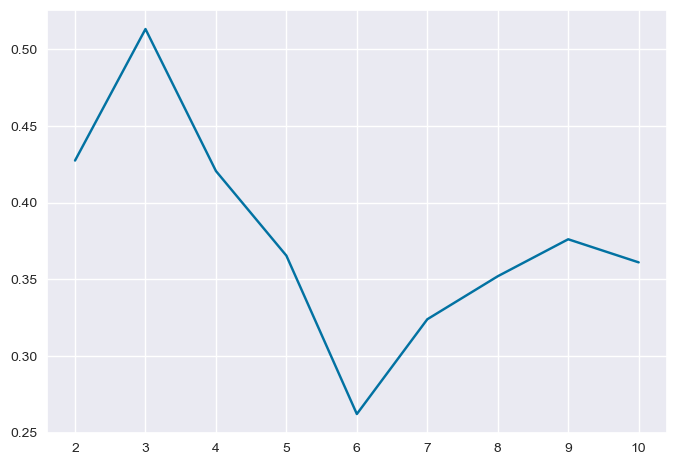

In [354]:
silhouette = []
for n_cl in range(2,11):
    gmix = mixture.GaussianMixture(n_components=n_cl, random_state=42)
    labels = gmix.fit_predict(df_pca)
    silhouette.append(metrics.silhouette_score(df_pca, labels))
plt.plot(range(2,11), silhouette);
print(f'Оптимальное количество кластеров: {np.argmax(silhouette) + 2}')
print(f'Максимальное значение коэффициента силуэта: {max(silhouette):.2f}')

Тут тоже получилось отпимальное количество кластеров 3.

Остановимся на 4.
Давайте посмотрим на распределение кластеров.
Обучим модель на декомпозированных данных.

In [355]:
kmeans = cluster.KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca)
df_pca.loc[:, 'Label'] = kmeans.labels_
df_pca['Label'].value_counts()

1    35
3    24
0    15
2    11
Name: Label, dtype: int64

Визуализируем результаты кластеризации:

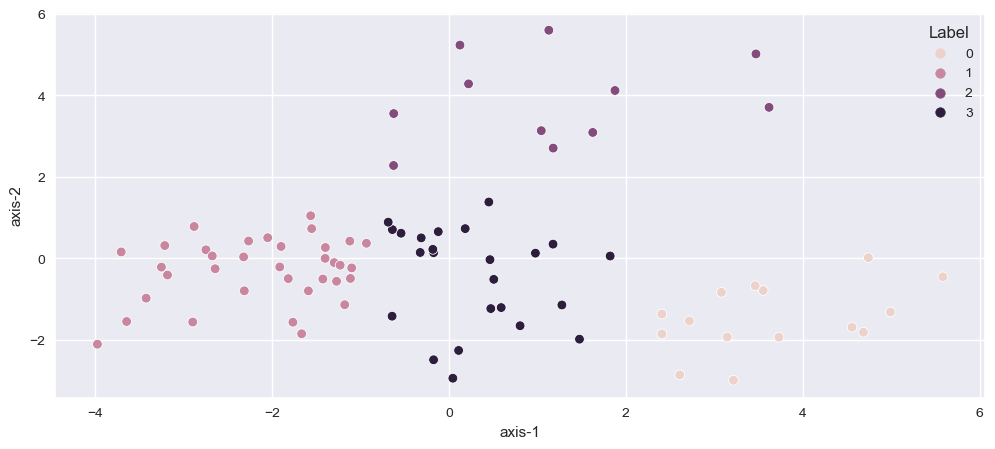

In [356]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=df_pca, 
    x='axis-1', 
    y='axis-2', 
    hue='Label',
);

Итак, у нас есть 4 кластера. Давайте посмотрим на них.

In [362]:
model_df['Cluster'] = kmeans.labels_
model_df_pivot = model_df.groupby('Cluster').mean().round()
model_df_pivot

,Child_mortality_rural,Disabled_31_60,Disabled_61_,Morbidity_onko,Morbidity_psiho,Morbidity_total,Poverty_percent,Cash_income,Socdem_pens,Socdem_trud,GRP,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Сrimes_total
Cluster,,,,,,,,,,,,,,,,,
0,77.0,527391.0,966346.0,2585.0,1641.0,45425.0,15.0,32893.0,6.0,53.0,291802.0,56951196.0,1.958890e+09,128363.0,105.0,16.0,15458.0
1,34.0,360256.0,665622.0,2586.0,1691.0,40641.0,22.0,22929.0,7.0,55.0,160528.0,7566144.0,2.324336e+08,84786.0,114.0,11.0,9566.0
2,16.0,317807.0,593545.0,2582.0,1702.0,52461.0,14.0,46460.0,5.0,52.0,397573.0,66688121.0,8.328013e+08,130113.0,140.0,13.0,9206.0
3,56.0,410750.0,769481.0,2587.0,1679.0,42054.0,18.0,27566.0,6.0,54.0,238320.0,34711002.0,7.962247e+08,104958.0,109.0,13.0,11394.0


In [363]:
def plot_cluster_profile(grouped_data, n_clusters):
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    s_scaler = preprocessing.StandardScaler()
    grouped_data = pd.DataFrame(s_scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаем список признаков
    features = grouped_data.columns
    # Создаем пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаем полярную диаграмму и добавляем ее на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название - номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

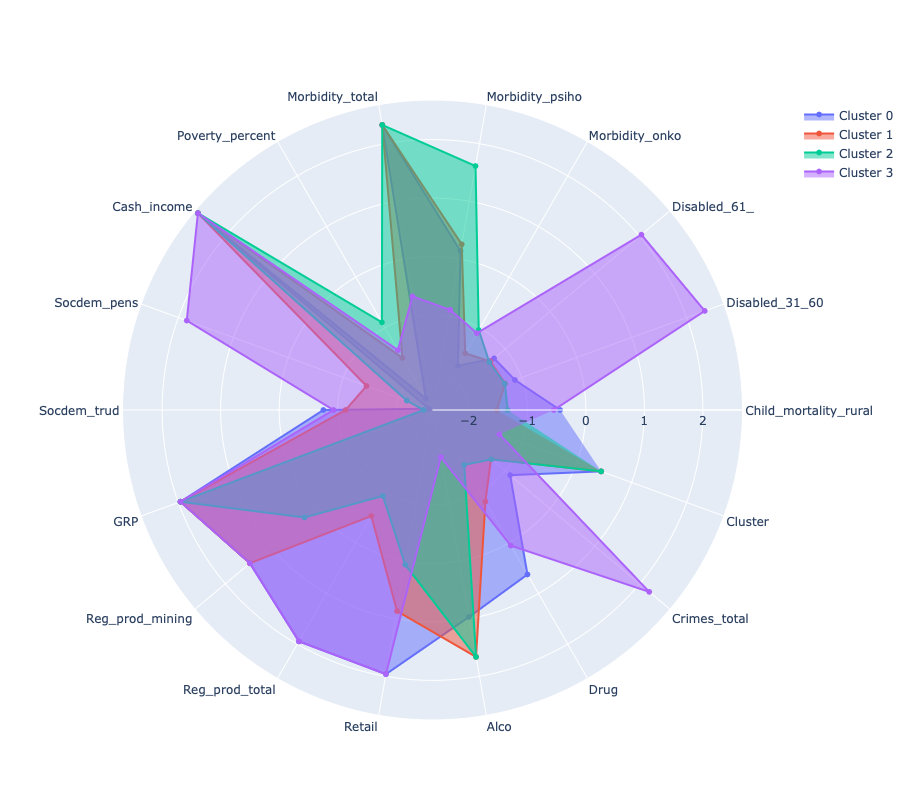

In [364]:
plot_cluster_profile(model_df, 4)

### Часть 2.

Мы производили кластеризацию в пространстве главных компонент. Вспомним, что PCA является линейным методом отображения исходного пространства признаков в его сжатую версию.

А что если использовать нелинейную трансформацию? Например, алгоритм снижения размерности t-SNE. Давайте попробуем и посмотрим, что получится.

### Алгоритм снижения размерности `TSNE`

In [365]:
from sklearn.manifold import TSNE

pipeline_tsne = Pipeline([
    ('scaler', preprocessing.StandardScaler()), 
    ('tsne', manifold.TSNE(perplexity=50, random_state=100))
])
df_tsne = pipeline_tsne.fit_transform(model_df)
print('{:.2f}'.format(pipeline_tsne['tsne'].kl_divergence_))

0.13


Визуализировав пространство после декомпозиции с помощью t-SNE, мы получим следующую картину:

In [366]:
df_tsne = pd.DataFrame(df_tsne, columns=['axis-1', 'axis-2'])
df_tsne

,axis-1,axis-2
0,-2.110228,18.886744
1,-1.884330,18.798307
2,-1.863911,18.621426
3,-2.983950,20.740082
4,-1.531070,19.269703
...,...,...
80,0.958673,21.271015
81,1.865074,21.151678
82,1.704615,22.276913
83,1.225186,22.340519


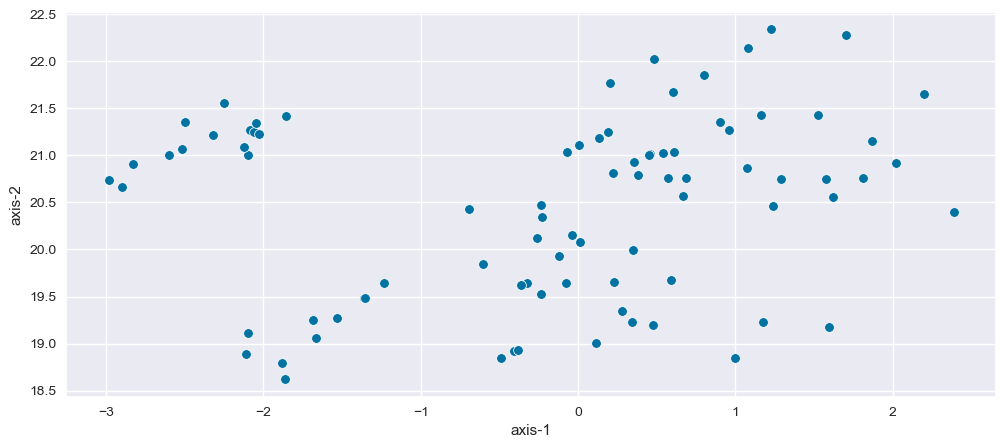

In [367]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_tsne, x='axis-1', y='axis-2');

### Метод `K-means`

Попробуем воспользоваться методом k-means. 
Подберите оптимальное количество кластеров для метода k-means с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. 
В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

Оптимальное количество кластеров: 5
Максимальное значение коэффициента силуэта: 0.53


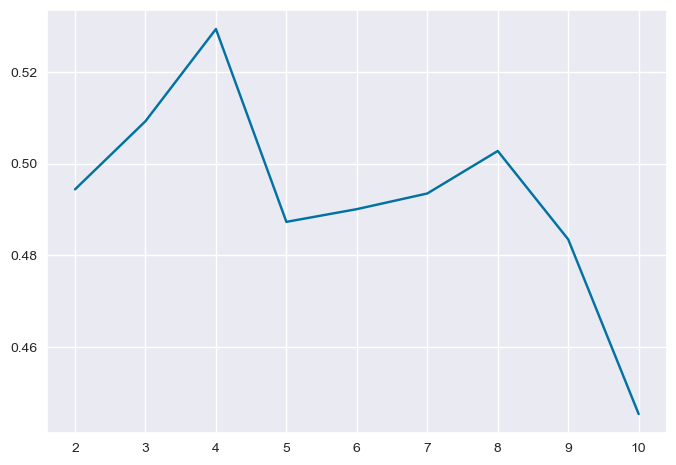

In [368]:
silhouette = []
for n_cl in range(2,11):
    kmeans = cluster.KMeans(n_cl, random_state=42)
    kmeans.fit(df_tsne)
    silhouette.append(metrics.silhouette_score(df_tsne, kmeans.labels_))
plt.plot(range(2,11), silhouette);
print(f'Оптимальное количество кластеров: {np.argmax(silhouette) + 3}')
print(f'Максимальное значение коэффициента силуэта: {max(silhouette):.2f}');

Тут также 4 кластера

<AxesSubplot: xlabel='cluster', ylabel='inertia'>

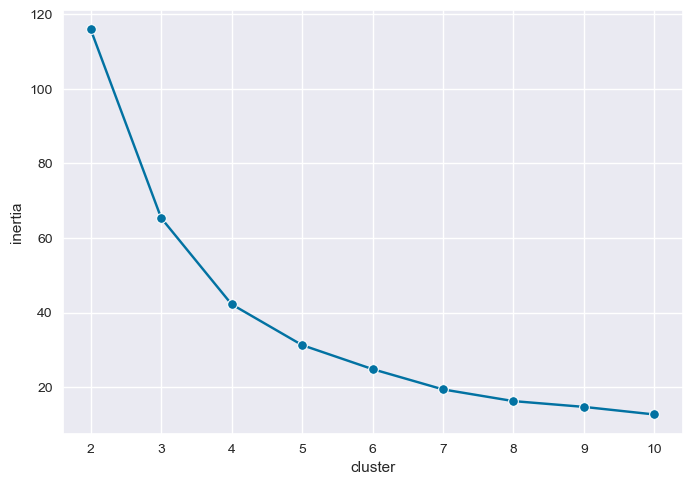

In [369]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, df_tsne):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(df_tsne)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df_tsne

# итерируемся по разным размерам кластеров (от 2 до 10) и сохраним значение инерции для каждого кластера
for cluster_num in range(2, 11):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, df_tsne))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

По методу локтя тоже получается 4 кластера.

### `EM`-алгоритм

Попробуем воспользоваться EM-алгоритом. 

Подберем оптимальное количество кластеров для EM-алгоритма (GaussianMixture)  с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. 


Оптимальное количество кластеров: 5
Максимальное значение коэффициента силуэта: 0.53


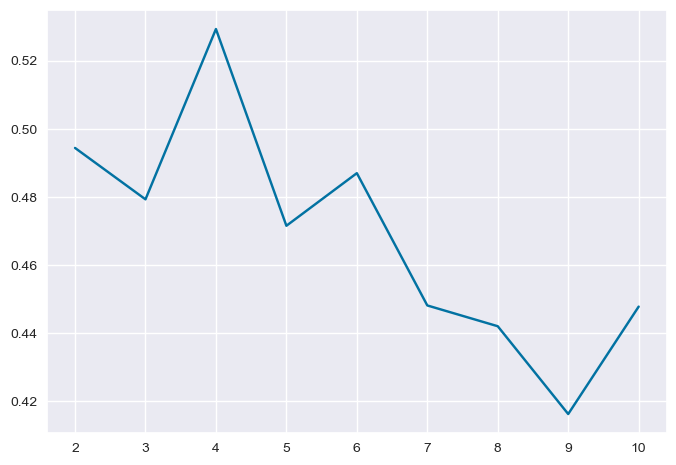

In [370]:
silhouette = []
for n_cl in range(2,11):
    gmix = mixture.GaussianMixture(n_cl, random_state=42)
    labels = gmix.fit_predict(df_tsne)
    silhouette.append(metrics.silhouette_score(df_tsne, labels))
plt.plot(range(2,11), silhouette);
print(f'Оптимальное количество кластеров: {np.argmax(silhouette) + 3}')
print(f'Максимальное значение коэффициента силуэта: {max(silhouette):.2f}');

Тут получилось 4 кластера

### `AgglomerativeClustering`

Наконец, попробуем воспользоваться алгоритмом алгомеративной кластеризации (AgglomerativeClustering).

Подберем оптимальное количество кластеров для алгоритма агломеративной кластеризации с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. 

Оптимальное количество кластеров: 5
Максимальное значение коэффициента силуэта: 0.53


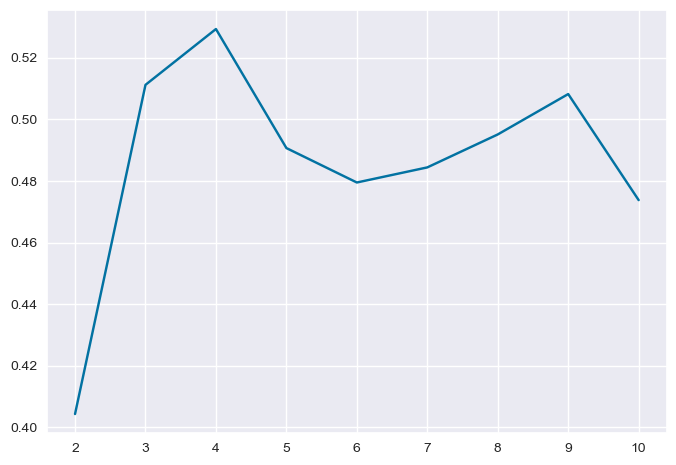

In [371]:
silhouette = []
for n_cl in range(2,11):
    tree = cluster.AgglomerativeClustering(n_cl)
    tree.fit(df_tsne)
    silhouette.append(metrics.silhouette_score(df_tsne, tree.labels_))
plt.plot(range(2,11), silhouette);
print(f'Оптимальное количество кластеров: {np.argmax(silhouette) + 3}')
print(f'Максимальное значение коэффициента силуэта: {max(silhouette):.2f}')

Тут тоже получилось 4 кластера.

Почти по всем методам у нас оптимальное количество это 4 кластера.

In [372]:
tree = cluster.KMeans(4)
tree.fit(df_tsne)

pd.DataFrame((np.unique(tree.labels_, return_counts=True)))

,0,1,2,3
0,0,1,2,3
1,15,35,25,10


Визуализируем результаты кластеризации:

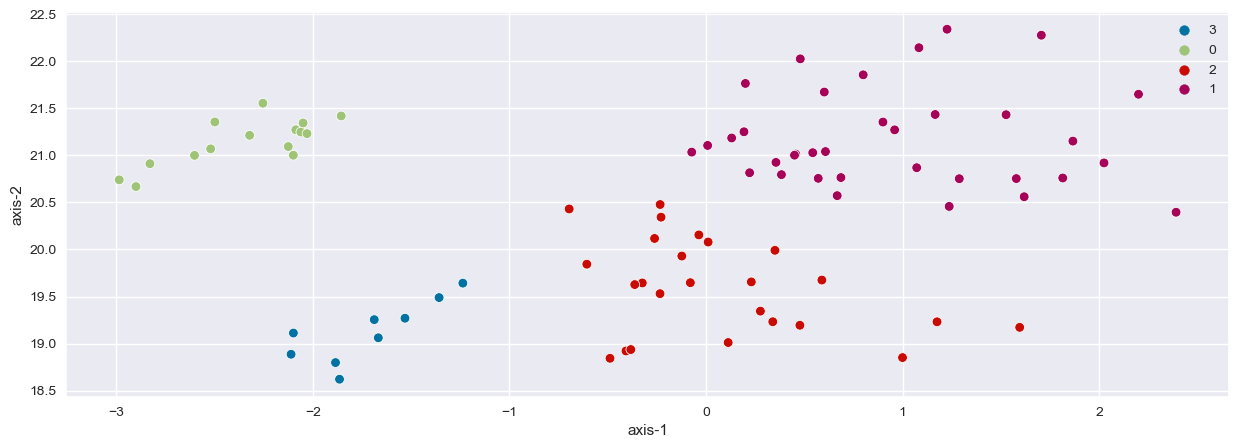

In [373]:
fig = plt.figure(figsize=(15, 5))
sns.scatterplot(data=df_tsne, x='axis-1', y='axis-2', hue=tree.labels_.astype('str'));

### Часть 3.

Мы обучали наши алгоритмы кластеризации на сжатом с помощью t-SNE пространстве признаков. То есть, чтобы сделать предсказание для новых объектов, не попавших в выборку, нам необходимо будет совершить трансформацию признаков этих объектов в новое сжатое пространство. 

Однако проблема t-SNE заключается в том, что алгоритм непараметрический. Это значит, что он, в отличие от таких алгоритмов, как PCA и SVD, не создаёт явной функции отображения. Проще говоря, алгоритм трансформирует пространство признаков для обучающей выборки, но не запоминает, каким образом это делает. Это значит, что, передав в алгоритм новые объекты для сжатия пространства, мы получим абсолютно новое представление пространства, не имеющее отношения к тому, что мы построили для обучающей выборки. То есть произойдёт искажение, что может привести к неверным результатам кластеризации.

Именно поэтому у класса TSNE из библиотеки sklearn нет такого метода, как transform(), у него есть только метод fit_transform() — заново обучить алгоритм t-SNE и произвести трансформацию.

Как же тогда производить кластеризацию для новых объектов, если мы не можем сжимать размерность для новых данных?

Давайте сведём задачу кластеризации к задаче классификации. Действительно, у нас теперь есть истинные метки кластеров. Давайте обучим модель, которая на основе таблицы-характеристик будет предсказывать кластер. 

Разделим исходные данные на тренировочную и тестовую выборки в соотношении 80/20. В качестве параметра random_state возьмием число 42.

In [374]:
X = model_df.drop(columns='Cluster')
y = model_df['Cluster']
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42)
y_test.shape[0]

17

Дальше нам осталось только построить несколько моделей и выбрать из них лучшую. 
Мы знаем, что алгоритм t-SNE является нелинейным методом понижения размерности. Можно смело предположить, что линейные модели, такие как логистическая регрессия, в данной задаче нам мало чем помогут.

Поэтому давайте сразу возьмём тяжелую артиллерию — ансамблевые алгоритмы. 

Начнём со случайного леса. 

С помощью GridSearchCV организуйте перебор параметров случайного леса (RandomForestClassifier) на следующей сетке параметров:

```
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}
```
В качестве параметра random_state для модели случайного леса используем число 42.
В качестве метрики используем accuracy. Количество фолдов для кросс-валидации — 5.

1) Обучим GridSearchCV на тренировочной выборке. 

2) С помощью лучшей модели сделаем предсказание для тестовой выборки и рассчитаем метрику accuracy.



In [375]:
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

grid_search = model_selection.GridSearchCV(
    estimator = ensemble.RandomForestClassifier(
        random_state=42), 
    param_grid=param_grid, 
    scoring = 'accuracy',
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X_train, y_train) 
print(f'Best parameters: {grid_search.best_params_}')
y_test_pred = grid_search.predict(X_test)
print('Test accuracy score: {:.3f}' \
    .format(metrics.accuracy_score(y_test, y_test_pred)))

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 500}
Test accuracy score: 0.941


Итак, значение метрики accuracy нормальное, но посмотрим, можно ли его улучшить. Давайте попробуем его улучшить, воспользовавшись бустингом.

С помощью GridSearchCV организуем перебор параметров градиентного бустинга (GradientBoostingClassifier) на следующей сетке параметров:
```
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}
```

В качестве параметра random_state для модели градиентного бустинга используем число 42.
В качестве метрики используем accuracy. Количество фолдов для кросс-валидации — 5. 

1) Обучим GridSearchCV на тренировочной выборке. 

2) С помощью лучшей модели сделаем предсказание для тестовой выборки и рассчитаем метрику accuracy. 



In [378]:
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}

grid_search = model_selection.GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        random_state=42), 
    param_grid=param_grid, 
    scoring = 'accuracy',
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X_train, y_train) 
print(f'Best parameters: {grid_search.best_params_}')
y_test_pred = grid_search.predict(X_test)
print('Test accuracy score: {:.3f}' \
    .format(metrics.accuracy_score(y_test, y_test_pred)))

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Test accuracy score: 0.824


Отлично, мы справились с проблемой непараметричности t-SNE и смогли перейти от решения задачи кластеризации к задаче классификации. Теперь у нас есть модель, которая на основе характеристик данных  автоматически определяет его кластер.

## <center> Optuna

Optuna - это достаточно новый фреймворк/библиотека, разработанный специально для оптимизации гиперпараметров. Помимо байесовских алгоритмов, есть возможность удаления плохих комбинаций из рассмотрения. По умолчанию удаляет комбинации, в которых модель дает качество ниже медианы из уже рассмотренных. Optuna помогает  быстрее находить лучшие гиперпараметры и работает с большинством современных известных библиотек ML, таких как scikit-learn, xgboost, PyTorch, TensorFlow, skorch, lightgbm, Keras, fast-ai и др.

In [404]:
import optuna
from hyperopt import hp, fmin, tpe, Trials
from sklearn import linear_model

In [405]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [406]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(max_iter = 1000)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)
print("accuracy на тестовом наборе: {:.2f}".format(log_reg.score(X_test_scaled, y_test)))
y_test_pred = log_reg.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred, average='micro')))

accuracy на тестовом наборе: 0.94
f1_score на тестовом наборе: 0.94


In [407]:
# зафксируем random_state
random_state = 42
X=X_train_scaled
y=y_train

In [408]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled) , average='micro')

  return score

In [409]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-03-27 16:43:23,226] A new study created in memory with name: RandomForestClassifier
[I 2023-03-27 16:43:23,367] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 179, 'max_depth': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:23,471] Trial 1 finished with value: 0.9558823529411765 and parameters: {'n_estimators': 148, 'max_depth': 27, 'min_samples_leaf': 8}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:23,591] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 174, 'max_depth': 27, 'min_samples_leaf': 2}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:23,709] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 171, 'max_depth': 15, 'min_samples_leaf': 2}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:23,782] Trial 4 finished with value: 0.9852941176470589 and parameters: {'n_estimators': 108, 'max_depth': 30, 'min_samples_leaf': 5}. Best is trial 0 with value: 1.0.
[I 2023-03-27

CPU times: user 2.34 s, sys: 42.5 ms, total: 2.38 s
Wall time: 2.38 s


In [410]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 179, 'max_depth': 10, 'min_samples_leaf': 3}
f1_score на обучающем наборе: 1.00


In [411]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred, average='micro')))

accuracy на тестовом наборе: 0.94
f1_score на тестовом наборе: 0.94


In [412]:
%%time
# можем прододжить подбор, указав n_trials(любое число, которое добавится к предыдущим итерациям) 
study.optimize(optuna_rf, n_trials=10)

[I 2023-03-27 16:43:31,536] Trial 20 finished with value: 1.0 and parameters: {'n_estimators': 125, 'max_depth': 24, 'min_samples_leaf': 4}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:31,648] Trial 21 finished with value: 1.0 and parameters: {'n_estimators': 145, 'max_depth': 12, 'min_samples_leaf': 3}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:31,736] Trial 22 finished with value: 0.9852941176470589 and parameters: {'n_estimators': 119, 'max_depth': 11, 'min_samples_leaf': 5}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:31,873] Trial 23 finished with value: 1.0 and parameters: {'n_estimators': 185, 'max_depth': 16, 'min_samples_leaf': 3}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:31,977] Trial 24 finished with value: 1.0 and parameters: {'n_estimators': 143, 'max_depth': 13, 'min_samples_leaf': 4}. Best is trial 0 with value: 1.0.
[I 2023-03-27 16:43:32,068] Trial 25 finished with value: 1.0 and parameters: {'n_estimators': 123, 'max_depth': 12

CPU times: user 1.04 s, sys: 18.8 ms, total: 1.05 s
Wall time: 1.05 s


Рассмотрим различные визуализации, доступные через Optuna, которые помогают принимать лучшие решения, видеть влияние различных гиперпараметров на производительность модели.


График истории оптимизации - отображает количество испытаний на оси Х и метрику на оси Y.

Следует использовать эту диаграмму, чтобы проверить, идет ли оптимизация гиперпараметров в правильном направлении или нет.

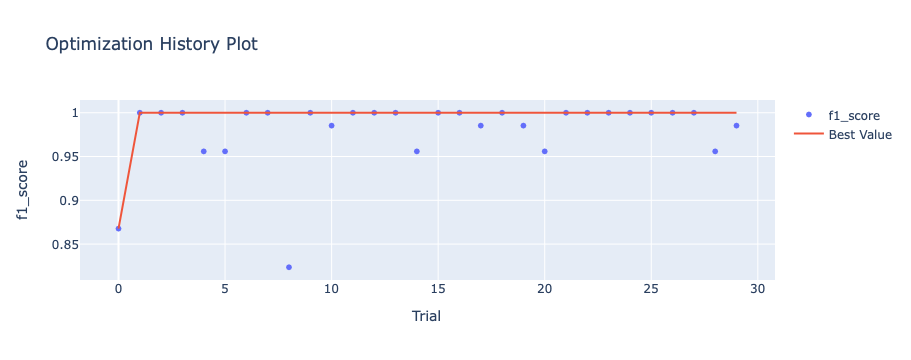

In [388]:
optuna.visualization.plot_optimization_history(study, target_name="f1_score")

В нашем случае, все идет верно, метрика максимизируется.

График важности гиперпараметров - помогает понять, какие гиперпараметры вносят больший вклад в минимизацию/максимизацию метрики.

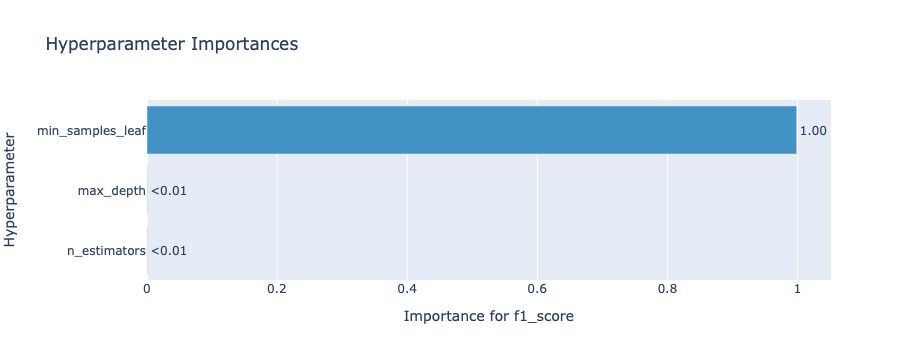

In [389]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")

Из этого графика можно сделать вывод, что стоит обратить большее внимание на настройку гиперпараметра min_sampeles_leaf

График контура отношений гиперпараметров

Он показывает связь между различными комбинациями гиперпараметров и значение метрики для этих комбинаций в виде контурного графика.

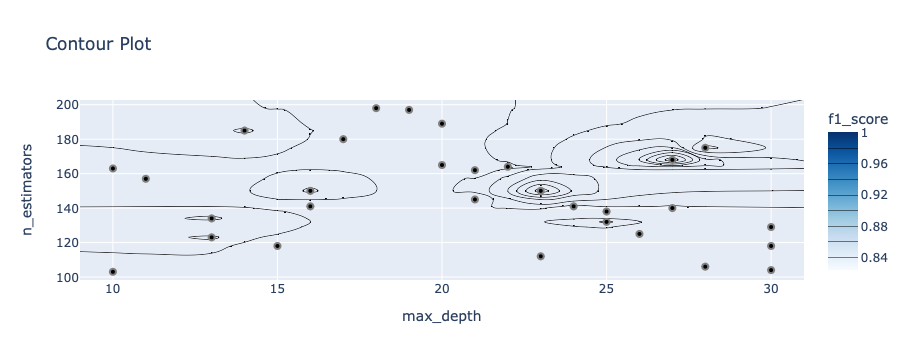

In [390]:
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  target_name="f1_score")

Точки с белым фоном это и есть лучшии комбинации n_estimator, max_depth.

# <CENTER> КЛАСТЕРЫ

In [413]:
model_df['Cluster'].unique()

array([2, 0, 3, 1], dtype=int32)

## Знакомство с кластерами:

Посмотрим на кластеры:

In [414]:
Cluster_0=model_df[model_df['Cluster']==0].mean().round()
Cluster_1=model_df[model_df['Cluster']==1].mean().round()
Cluster_2=model_df[model_df['Cluster']==2].mean().round()
Cluster_3=model_df[model_df['Cluster']==3].mean().round()

Clusters=pd.concat([Cluster_0, Cluster_1, Cluster_2, Cluster_3], axis=1)

In [415]:
#Cоставим таблицу кластеров со средними значениями:
Clusters.rename(columns={0:"Cluster_1"}, inplace=True)
Clusters.rename(columns={1:"Cluster_2"}, inplace=True)
Clusters.rename(columns={2:"Cluster_3"}, inplace=True)
Clusters.rename(columns={3:"Cluster_4"}, inplace=True)
Clusters

,Cluster_1,Cluster_2,Cluster_3,Cluster_4
Child_mortality_rural,7.700000e+01,34.0,16.0,56.0
Disabled_31_60,5.273910e+05,360256.0,317807.0,410750.0
Disabled_61_,9.663460e+05,665622.0,593545.0,769481.0
Morbidity_onko,2.585000e+03,2586.0,2582.0,2587.0
Morbidity_psiho,1.641000e+03,1691.0,1702.0,1679.0
Morbidity_total,4.542500e+04,40641.0,52461.0,42054.0
Poverty_percent,1.500000e+01,22.0,14.0,18.0
Cash_income,3.289300e+04,22929.0,46460.0,27566.0
Socdem_pens,6.000000e+00,7.0,5.0,6.0
Socdem_trud,5.300000e+01,55.0,52.0,54.0


### 1 Кластер

In [416]:
model_df[model_df['Cluster']==0].describe()

,Child_mortality_rural,Disabled_31_60,Disabled_61_,Morbidity_onko,Morbidity_psiho,Morbidity_total,Poverty_percent,Cash_income,Socdem_pens,Socdem_trud,GRP,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Сrimes_total,Cluster
count,15.000000,15.000000,1.500000e+01,15.000000,15.00000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000,15.00000,15.000000,15.0
mean,76.668000,527390.614000,9.663463e+05,2585.154667,1641.29200,45424.857333,15.473333,32893.120667,6.08200,52.824000,291801.580000,5.695120e+07,1.958890e+09,128362.938667,105.163333,15.91000,15458.118667,0.0
std,25.232264,51673.197049,6.691704e+04,4.306455,134.91855,5079.494415,2.873762,8364.679220,1.84432,2.753387,72835.047441,2.996631e+07,3.003859e+08,21102.790913,21.927996,4.45464,1241.727407,0.0
min,28.160000,448358.500000,8.263591e+05,2578.300000,1488.14000,36384.260000,11.440000,23141.670000,3.25000,47.280000,192274.560000,1.446106e+06,1.322817e+09,90223.410000,71.350000,9.64000,12722.680000,0.0
25%,62.115000,490327.865000,9.146709e+05,2583.040000,1544.52000,43038.435000,13.420000,28412.750000,4.98000,50.860000,234635.285000,2.920660e+07,1.959997e+09,120045.065000,92.605000,12.10500,14806.070000,0.0
50%,89.450000,502649.180000,1.006660e+06,2585.170000,1604.26000,45300.850000,15.050000,29723.830000,5.60000,54.280000,282987.500000,7.978268e+07,2.084474e+09,128387.860000,101.620000,15.12000,15366.320000,0.0
75%,98.230000,586692.345000,1.020362e+06,2587.565000,1694.14500,47977.455000,17.125000,35140.915000,7.57500,54.525000,319622.180000,7.978268e+07,2.158961e+09,145245.770000,112.530000,19.63000,16695.910000,0.0
max,98.230000,591551.050000,1.020362e+06,2593.900000,1912.45000,55632.260000,21.500000,53568.330000,9.77000,56.920000,421542.810000,7.978268e+07,2.158961e+09,154066.410000,147.820000,22.19000,16695.910000,0.0


In [417]:
#Посмотрим какие города вошли в этот кластер:
cluster_1 = list(model_df[model_df['Cluster'] == 0].index)
print (', '.join(cluster_1))

Город Москва, Московская область, Город Санкт-Петербург, Свердловская область, Краснодарский край, Республика Татарстан, Нижегородская область, Красноярский край, Пермский край, Республика Башкортостан, Ростовская область, Самарская область, Челябинская область, Иркутская область, Кемеровская область


In [418]:
Cluster_1=Clusters['Cluster_1']
Cluster_1

Child_mortality_rural    7.700000e+01
Disabled_31_60           5.273910e+05
Disabled_61_             9.663460e+05
Morbidity_onko           2.585000e+03
Morbidity_psiho          1.641000e+03
Morbidity_total          4.542500e+04
Poverty_percent          1.500000e+01
Cash_income              3.289300e+04
Socdem_pens              6.000000e+00
Socdem_trud              5.300000e+01
GRP                      2.918020e+05
Reg_prod_mining          5.695120e+07
Reg_prod_total           1.958890e+09
Retail                   1.283630e+05
Alco                     1.050000e+02
Drug                     1.600000e+01
Сrimes_total             1.545800e+04
Cluster                  0.000000e+00
Name: Cluster_1, dtype: float64

- В 1 кластер входят 15 регионов.
- 15% людей живет за чертой бедности.
- Средний уровень доходов 32893 руб.
- Самое большое количество производств.
- Самый большой показатель больных наркоманией среди регионов.
- Самый высокий уровень престпуности.
- Достаточно высокий уровень жизни.
- Самое большое количество людей с инвалидностью по всем возрастам.

Эти данные скорее всего связаны, что в этот кластер вошли такие города как Москва и Санкт-Петербург с самым большим населением.

### 2 Кластер

In [419]:
model_df[model_df['Cluster']==1].describe()

,Child_mortality_rural,Disabled_31_60,Disabled_61_,Morbidity_onko,Morbidity_psiho,Morbidity_total,Poverty_percent,Cash_income,Socdem_pens,Socdem_trud,GRP,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Сrimes_total,Cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.0
mean,33.988571,360256.012857,665622.334857,2585.780000,1691.231429,40641.446286,22.410000,22929.209429,6.714000,54.826286,160528.060857,7.566144e+06,2.324336e+08,84785.612571,114.170000,10.944286,9566.139143,1.0
std,13.598411,49417.488265,63678.699010,7.633177,157.811053,6749.291988,4.545151,3527.384768,2.190106,3.612074,41109.222973,1.583694e+07,1.867293e+08,19037.127105,20.784756,3.840622,1167.453253,0.0
min,12.860000,299954.450000,568439.000000,2573.650000,1446.220000,29806.020000,13.200000,16064.170000,1.950000,46.030000,83488.910000,1.300467e+05,6.804462e+06,42670.090000,65.810000,5.670000,7737.180000,1.0
25%,25.770000,337206.180000,614360.065000,2579.890000,1565.700000,35650.615000,18.960000,20296.920000,4.950000,52.700000,138658.175000,5.869064e+05,5.766036e+07,77635.205000,102.545000,8.455000,8752.205000,1.0
50%,31.840000,354468.230000,661033.360000,2585.930000,1625.900000,41186.910000,21.380000,23780.170000,6.720000,55.080000,159780.830000,1.360155e+06,2.226986e+08,88192.550000,116.910000,10.310000,9322.270000,1.0
75%,37.155000,372843.770000,714169.480000,2591.935000,1889.120000,46851.645000,25.875000,25292.080000,8.525000,57.370000,186170.010000,5.668351e+06,3.091195e+08,99136.225000,126.195000,12.935000,10125.885000,1.0
max,71.000000,591551.050000,795192.000000,2597.600000,1912.450000,52391.010000,30.030000,31840.000000,10.980000,61.420000,251598.530000,7.978268e+07,7.656570e+08,109737.410000,150.020000,22.190000,12609.320000,1.0


In [420]:
#Посмотрим какие города вошли в этот кластер:
cluster_2 = list(model_df[model_df['Cluster'] == 1].index)
print (', '.join(cluster_2))

Архангельская область, Калининградская область, Республика Адыгея, Город Севастополь, Тамбовская область, Брянская область, Новгородская область, Смоленская область, Тверская область, Рязанская область, Еврейская автономная область, Ивановская область, Орловская область, Республика Бурятия, Костромская область, Забайкальский край, Владимирская область, Псковская область, Чеченская Республика, Ульяновская область, Республика Северная Осетия-Алания, Кировская область, Пензенская область, Республика Хакасия, Курганская область, Кабардино-Балкарская Республика, Республика Крым, Республика Марий Эл, Республика Алтай, Чувашская Республика, Республика Мордовия, Карачаево-Черкесская Республика, Республика Калмыкия, Республика Тыва, Республика Ингушетия


In [421]:
Cluster_2=Clusters['Cluster_2']
Cluster_2

Child_mortality_rural           34.0
Disabled_31_60              360256.0
Disabled_61_                665622.0
Morbidity_onko                2586.0
Morbidity_psiho               1691.0
Morbidity_total              40641.0
Poverty_percent                 22.0
Cash_income                  22929.0
Socdem_pens                      7.0
Socdem_trud                     55.0
GRP                         160528.0
Reg_prod_mining            7566144.0
Reg_prod_total           232433649.0
Retail                       84786.0
Alco                           114.0
Drug                            11.0
Сrimes_total                  9566.0
Cluster                          1.0
Name: Cluster_2, dtype: float64

- Во 2 кластер входят 35 регионов. Самый многочисленный кластер.
- 22% людей живет за чертой бедности.
- Один из больших показателей больных алкоголтизмом среди регионов.
- Средний доход 22929 руб.
- Большего всего малоимущих трудящихся и пенсионеров.
- Самый низкий оборот розничной торговли и регионального продукта.

### 3 Кластер

In [422]:
model_df[model_df['Cluster']==2].describe()

,Child_mortality_rural,Disabled_31_60,Disabled_61_,Morbidity_onko,Morbidity_psiho,Morbidity_total,Poverty_percent,Cash_income,Socdem_pens,Socdem_trud,GRP,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Сrimes_total,Cluster
count,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.0
mean,15.59000,317807.161818,593544.821818,2582.488182,1702.157273,52461.119091,14.493636,46459.573636,4.638182,52.256364,397573.113636,6.668812e+07,8.328013e+08,130113.045455,140.404545,13.119091,9206.095455,2.0
std,16.16962,24899.805118,39627.843420,7.976622,96.466003,7043.942224,3.593829,8957.530856,2.218039,3.635055,52786.642854,2.153252e+07,7.411772e+08,17937.217490,14.290001,5.463985,1142.263888,0.0
min,0.95000,290518.180000,551904.770000,2573.850000,1567.250000,42922.030000,7.400000,28694.330000,1.050000,45.250000,247449.180000,1.567986e+07,1.156411e+08,105641.320000,112.860000,5.580000,7736.090000,2.0
25%,6.54500,298032.500000,561775.320000,2575.225000,1639.150000,46083.620000,13.005000,41383.665000,3.150000,49.640000,401820.900000,6.000739e+07,2.485614e+08,116762.525000,135.295000,8.570000,8329.315000,2.0
50%,8.82000,310526.640000,582619.450000,2581.650000,1700.200000,54104.960000,15.390000,50059.500000,5.050000,54.420000,421542.810000,7.978268e+07,6.558383e+08,126194.950000,150.580000,14.190000,9174.770000,2.0
75%,16.88500,340542.340000,615023.705000,2587.800000,1724.455000,58853.215000,16.295000,53568.330000,6.245000,55.200000,421542.810000,7.978268e+07,1.103363e+09,144721.930000,150.580000,17.190000,9979.115000,2.0
max,56.18000,353896.730000,670008.230000,2596.760000,1912.450000,61160.980000,19.560000,53568.330000,7.750000,55.750000,421542.810000,7.978268e+07,2.158961e+09,154066.410000,150.580000,21.930000,11013.550000,2.0


In [423]:
#Посмотрим какие города вошли в этот кластер:
cluster_3 = list(model_df[model_df['Cluster'] == 2].index)
print (', '.join(cluster_3))

Ямало-Ненецкий автономный округ, Ненецкий автономный округ, Чукотский автономный округ, Магаданская область, Сахалинская область, Ханты-Мансийский автономный округ - Югра, Камчатский край, Республика Саха (Якутия), Мурманская область, Республика Коми, Республика Карелия


In [424]:
Cluster_3=Clusters['Cluster_3']
Cluster_3

Child_mortality_rural           16.0
Disabled_31_60              317807.0
Disabled_61_                593545.0
Morbidity_onko                2582.0
Morbidity_psiho               1702.0
Morbidity_total              52461.0
Poverty_percent                 14.0
Cash_income                  46460.0
Socdem_pens                      5.0
Socdem_trud                     52.0
GRP                         397573.0
Reg_prod_mining           66688121.0
Reg_prod_total           832801342.0
Retail                      130113.0
Alco                           140.0
Drug                            13.0
Сrimes_total                  9206.0
Cluster                          2.0
Name: Cluster_3, dtype: float64

- В 3 кластер входят 11 регионов.
- Всего 14% людей живет за чертой бедности.
- Самый высокий средний уровень дохода 46460руб.
- Самый высокий GRP.
- Больше всего производств по добыче полезных ископаемых.
- Самый большой оборот розничной торговли.

Доход был бы выше, но я удалила такие выбросы как 80 тр, которые как раз принадлежали этому кластеру.

### 4 Кластер

In [425]:
model_df[model_df['Cluster']==3].describe()

,Child_mortality_rural,Disabled_31_60,Disabled_61_,Morbidity_onko,Morbidity_psiho,Morbidity_total,Poverty_percent,Cash_income,Socdem_pens,Socdem_trud,GRP,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Сrimes_total,Cluster
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.0
mean,55.813750,410750.38250,769480.992083,2586.902500,1679.237917,42053.597500,18.432917,27565.568750,5.924167,53.808333,238320.075833,3.471100e+07,7.962247e+08,104958.432083,109.336667,12.700417,11394.113750,3.0
std,25.703551,59291.40985,89749.781525,5.282841,151.964892,7422.166485,3.196705,3970.758107,1.245353,3.436573,52586.943881,3.239005e+07,4.065074e+08,13293.060744,17.329865,4.315604,1585.493203,0.0
min,23.000000,334623.59000,615049.180000,2573.650000,1492.180000,29806.020000,13.300000,21397.500000,3.600000,45.250000,127962.830000,5.181823e+05,8.867320e+07,84509.590000,71.540000,6.490000,9335.360000,3.0
25%,37.942500,363469.77000,719545.692500,2583.702500,1561.102500,38764.772500,16.527500,24251.497500,5.272500,52.710000,211975.172500,5.264456e+06,5.008832e+08,91309.082500,100.005000,9.497500,10044.140000,3.0
50%,45.285000,400882.32000,756333.520000,2586.520000,1602.285000,40771.000000,17.875000,27406.165000,5.610000,54.880000,240847.410000,2.166721e+07,7.619998e+08,105338.795000,109.300000,11.945000,11457.910000,3.0
75%,77.922500,436993.00250,845371.490000,2590.447500,1819.922500,47314.855000,21.312500,29858.542500,6.645000,56.210000,272199.280000,6.858106e+07,1.033829e+09,114451.797500,120.837500,14.582500,12366.817500,3.0
max,98.230000,591551.05000,934390.860000,2597.600000,1912.450000,56744.100000,24.290000,38567.670000,9.150000,58.420000,325075.820000,7.978268e+07,1.786791e+09,131946.320000,138.550000,22.190000,15789.640000,3.0


In [426]:
#Посмотрим какие города вошли в этот кластер:
cluster_4 = list(model_df[model_df['Cluster'] == 3].index)
print (', '.join(cluster_4))

Хабаровский край, Приморский край, Амурская область, Белгородская область, Воронежская область, Ленинградская область, Липецкая область, Калужская область, Тюменская область, Новосибирская область, Ярославская область, Тульская область, Томская область, Курская область, Вологодская область, Республика Дагестан, Омская область, Удмуртская Республика, Астраханская область, Оренбургская область, Волгоградская область, Ставропольский край, Алтайский край, Саратовская область


In [427]:
Cluster_4=Clusters['Cluster_4']
Cluster_4

Child_mortality_rural           56.0
Disabled_31_60              410750.0
Disabled_61_                769481.0
Morbidity_onko                2587.0
Morbidity_psiho               1679.0
Morbidity_total              42054.0
Poverty_percent                 18.0
Cash_income                  27566.0
Socdem_pens                      6.0
Socdem_trud                     54.0
GRP                         238320.0
Reg_prod_mining           34711002.0
Reg_prod_total           796224721.0
Retail                      104958.0
Alco                           109.0
Drug                            13.0
Сrimes_total                 11394.0
Cluster                          3.0
Name: Cluster_4, dtype: float64

- Во 4 кластер входит 24 региона.
- 18% живут за уровнем бедности.
- В целом все покзатели находятся на среднем уровне.
- Средний уровень дохода 27 566 руб.



### ВЫВОДЫ:

- Самый неблагополучным является 2 кластер, в него вошли 35 регионов:
    - Архангельская область, 
    - Калининградская область, 
    - Республика Адыгея, 
    - Город Севастополь, 
    - Тамбовская область, 
    - Брянская область, 
    - Новгородская область, 
    - Смоленская область, 
    - Тверская область, 
    - Рязанская область, 
    - Еврейская автономная область, 
    - Ивановская область, 
    - Орловская область, 
    - Республика Бурятия, 
    - Костромская область, 
    - Забайкальский край, 
    - Владимирская область, 
    - Псковская область, 
    - Чеченская Республика, 
    - Ульяновская область, 
    - Республика Северная Осетия-Алания, 
    - Кировская область, Пензенская область, 
    - Республика Хакасия, 
    - Курганская область, 
    - Кабардино-Балкарская Республика, 
    - Республика Крым, 
    - Республика Марий Эл, 
    - Республика Алтай, 
    - Чувашская Республика, 
    - Республика Мордовия, 
    - Карачаево-Черкесская Республика, 
    - Республика Калмыкия, 
    - Республика Тыва, 
    - Республика Ингушетия

Посмотрим, какие из них наиболее остро нуждаются в помощи:

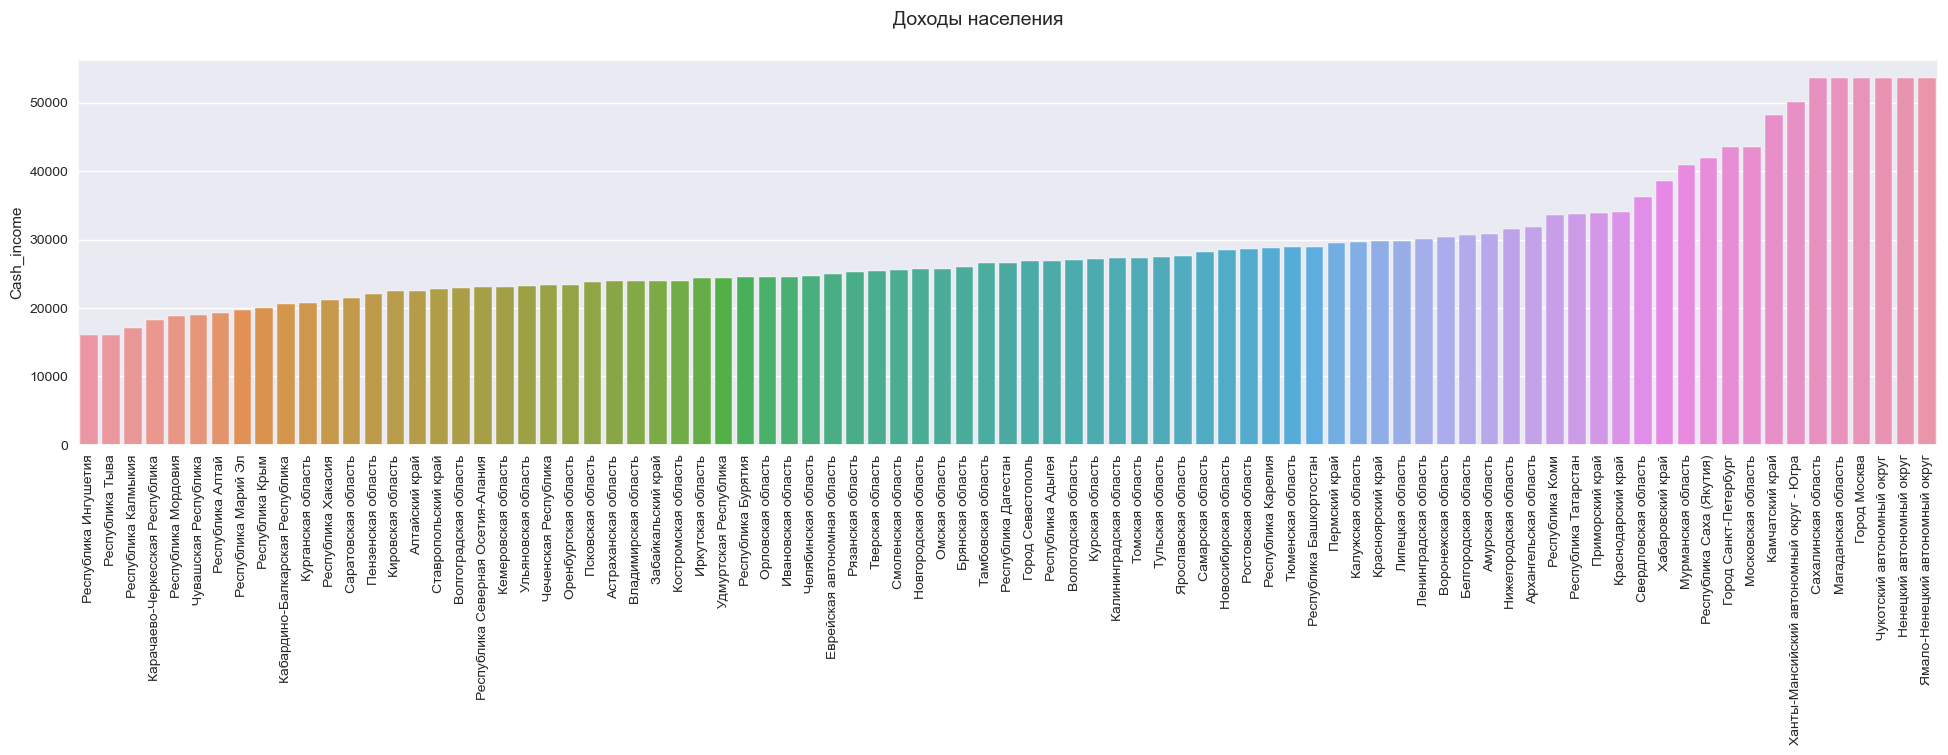

In [428]:
#Посмотрим на доходы населения:
model_df.sort_values(by='Cash_income', ascending=True, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=model_df, x=model_df.index, y='Cash_income')
fig.suptitle(
    'Доходы населения',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

ТОП-10 с самыми низкими доходами: Ингушетия, Тыва, Калмыкия, Карачаево-Черкессия, Мордовия, Чувашия, Алтай, Мэрий Эл, Крым, Кабардино-Балкария. Все они есть в нашем 2 кластере

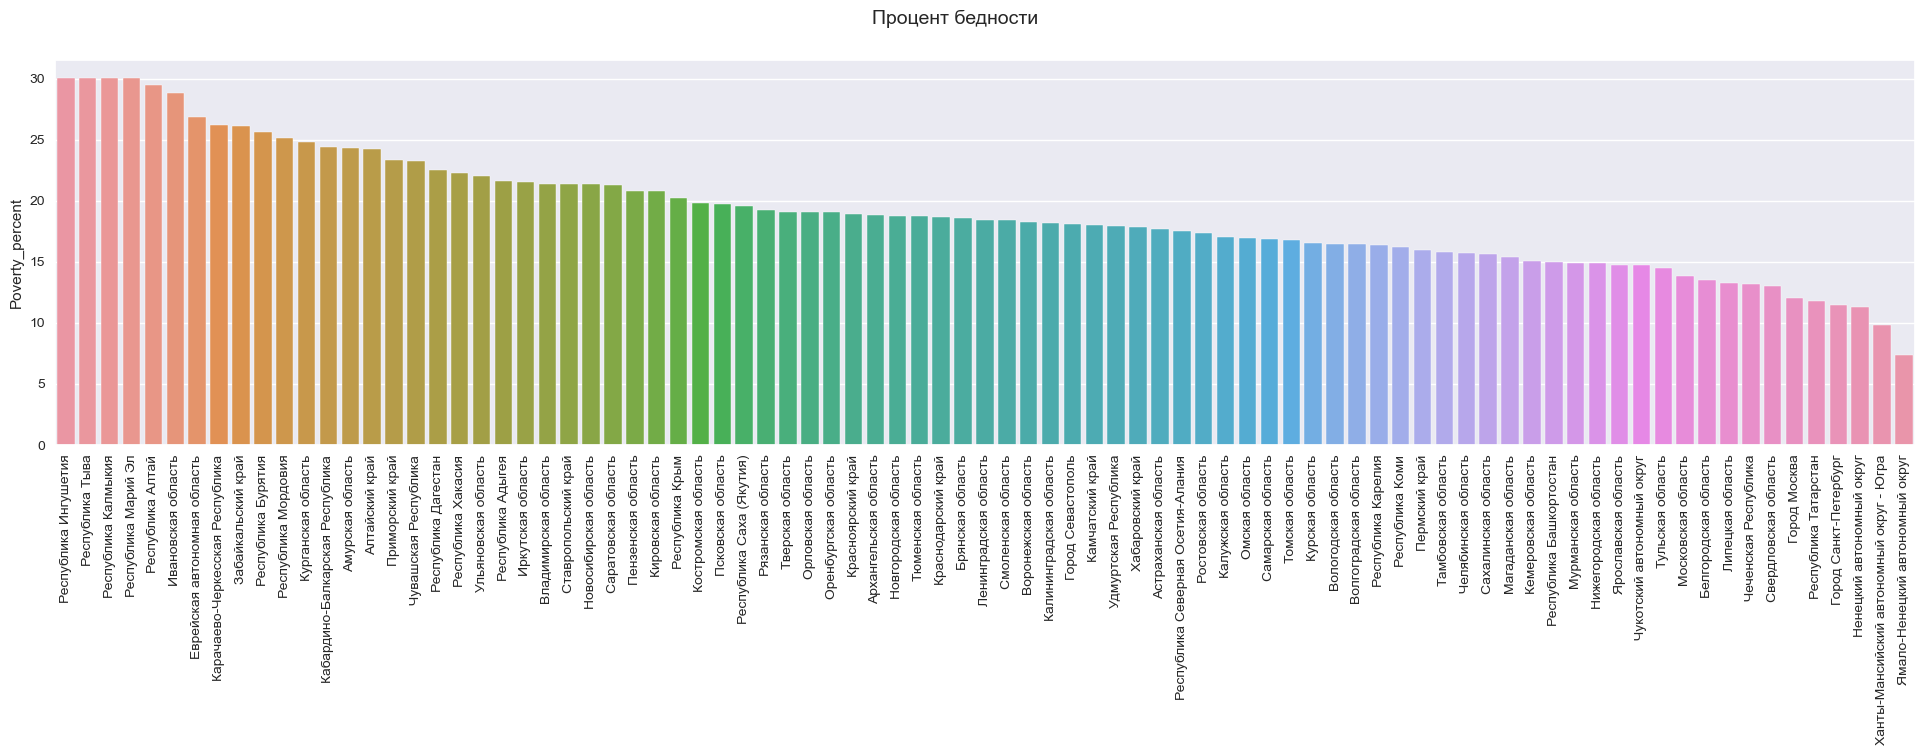

In [429]:
#Посмотрим на прожиточный минимум:
model_df.sort_values(by='Poverty_percent', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=model_df, x=model_df.index, y='Poverty_percent')
fig.suptitle(
    'Процент бедности',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

ТОП-5 с самым высоким процентом бедности: Ингушетия, Тыва, Калмыкия, Алтай, Мэрий Эл. Все они есть в нашем 2 кластере

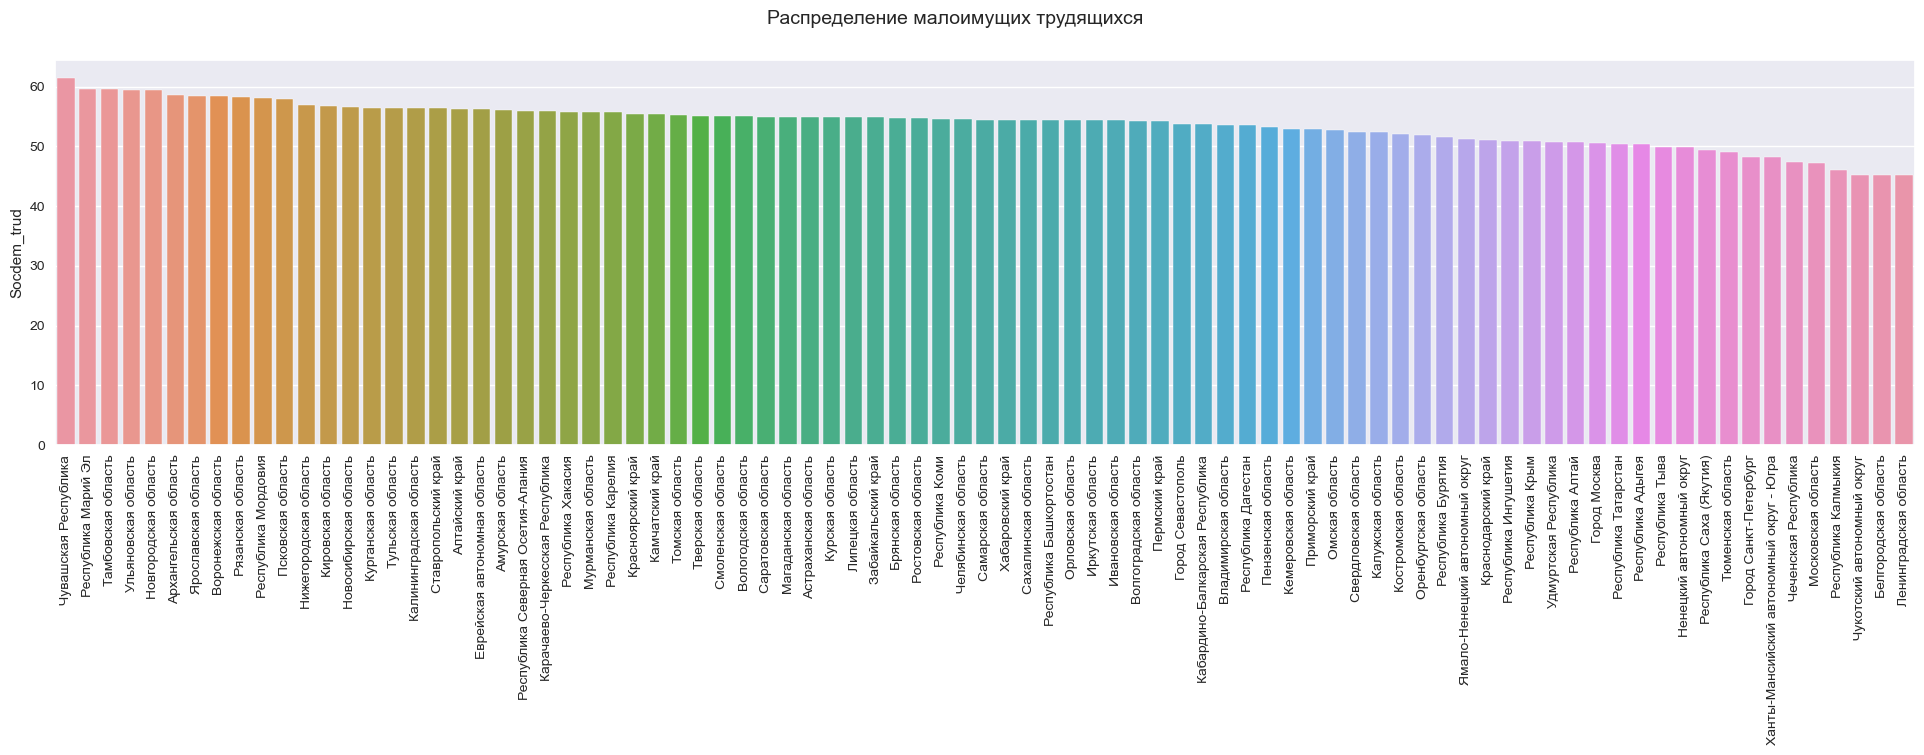

In [430]:
#Посмотрим на Распределение малоимущих трудящихся:
model_df.sort_values(by='Socdem_trud', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=model_df, x=model_df.index, y='Socdem_trud')
fig.suptitle(
    'Распределение малоимущих трудящихся',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Самое большое количество в Чувашии. 
ТОП-5: Чувашия, Марий Эл, Тамбовская, Ульяновская и Новгородская области. Все они также есть в нашем кластере

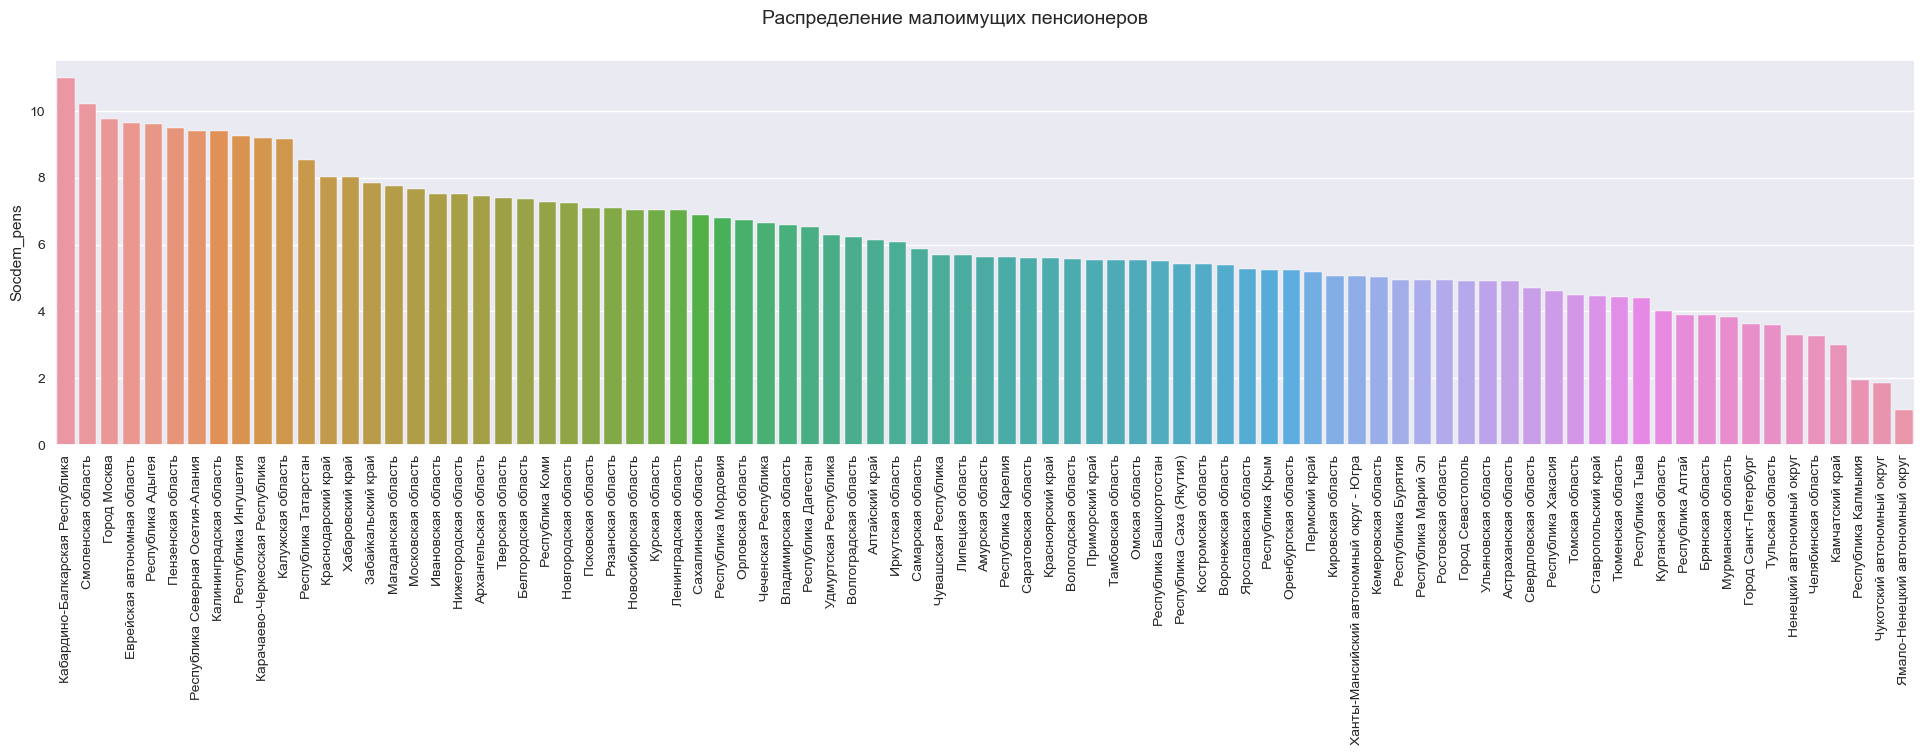

In [431]:
#Посмотрим Распределение малоимущих пенсионеров:
model_df.sort_values(by='Socdem_pens', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=model_df, x=model_df.index, y='Socdem_pens')
fig.suptitle(
    'Распределение малоимущих пенсионеров',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Больше всего малоимущих пенсионеров в Кабардино-Балкарии и Смоленской области.
В ТОП-10 вошли: Кабардино-Балкария, Смоленская обл., Москва, Еврейская обл.,Адыгея, Пензенская область, Северная осетия, Калининградская область, Ингушетия, Карачаево-Черкессия. Все они есть в нашем кластере, кроме Москвы, которая попала сюда из-за самого большого населения, а следовательно и пенсионеров.

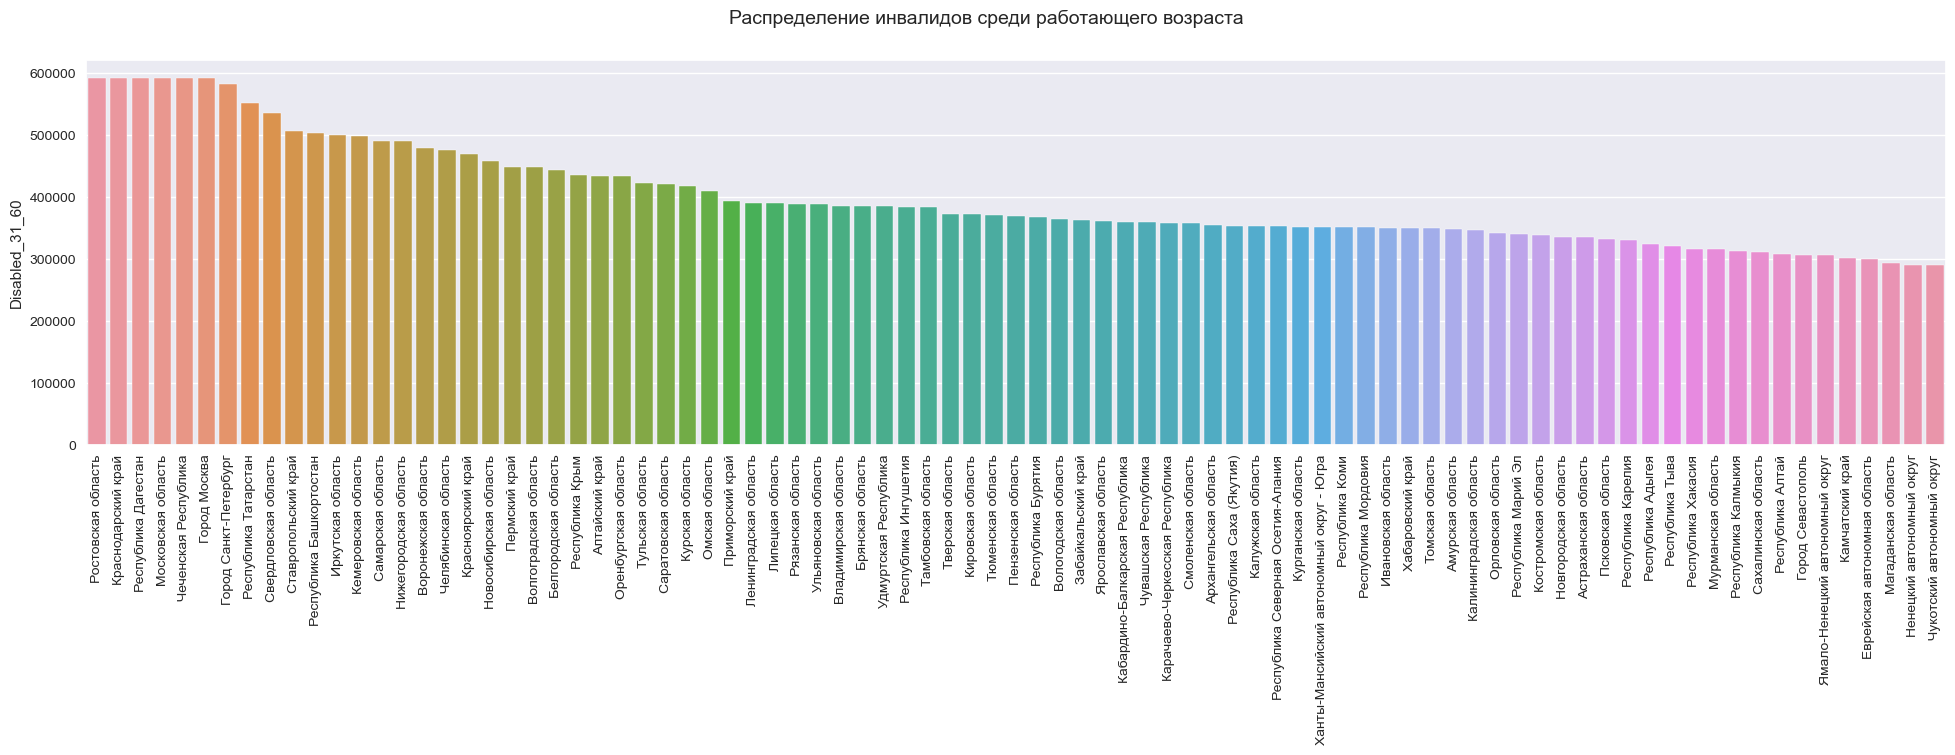

In [434]:
#Посмотрим на распределение инвалидов:
model_df.sort_values(by='Disabled_31_60', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=model_df, x=model_df.index, y='Disabled_31_60')
fig.suptitle(
    'Распределение инвалидов среди работающего возраста',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

В ТОП-5 попали регионы, не входящие в наш кластер, но их тоже стоит отметить: Ростовская область, Краснодарский край, Дагестан, Чечня

### ВЫВОД: 
В самый бедный кластер вошли 35 регионов, с низким уровнем дохода, высоким уровнем бедности. 

Следует обратить особое внимание на Ингушетию, Тыву, Калмыкию, Алтай, Мэрий Эл - там самый высокий уровень бедности и самые низкие доходы.

А также уделить особое внимание пенсионерами в Смоленской области и Кабардино-Балкарской республике.

Также следует уделить внимание пенсионерам Ростовской области, тк там самое большое количество по всем возрастам, хоть они и не вошли в наш кластер по другим показателям.

## <center> ПРОВЕРКА ГИПОТЕЗ

◆ влияет ли число детей, пенсионеров и других социально уязвимых групп на уровень бедности в регионе;

◆ связаны ли уровень бедности/социального неблагополучия с производством и потреблением в регионе;

◆ влияет ли уровень бедности на потребление алкоголя/наркотиков и роста преступности.

**1 ГИПОТЕЗА:** Влияет ли число детей, пенсионеров и других социально уязвимых групп на уровень бедности в регионе?

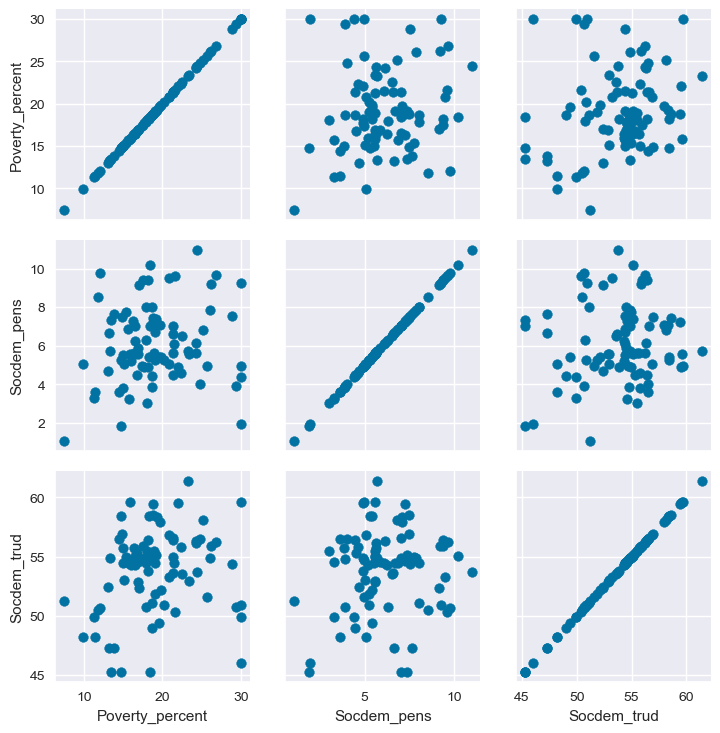

In [436]:
#Построим график зависимостей между следующими показателями:
gip_1 = model_df[['Poverty_percent', 'Socdem_pens', 'Socdem_trud']]
pg = sns.PairGrid(gip_1)
pg.map(plt.scatter)

**Вывод: На графиках прослеживается очень слабая прямая зависимость, поэтому можно сказать что влияет, но слабо.**

**2 ГИПОТЕЗА:** Связаны ли уровень бедности/социального неблагополучия с производством и потреблением в регионе?

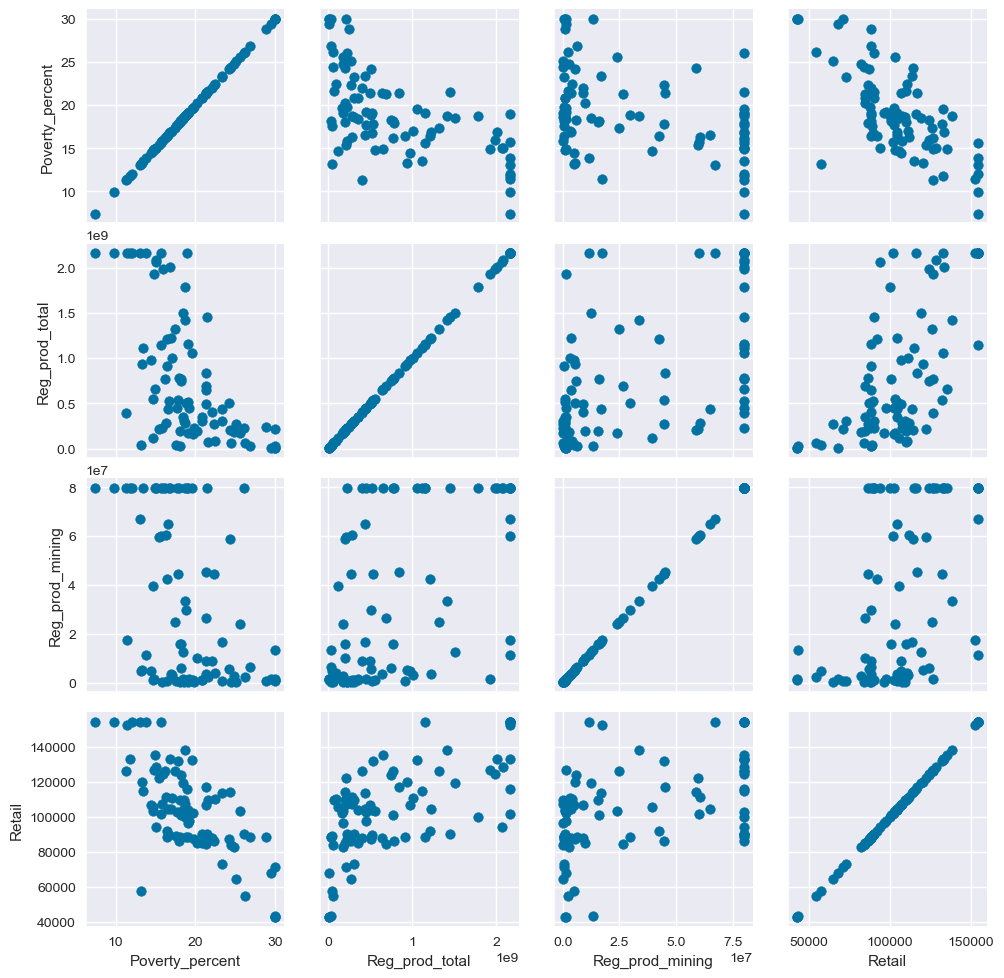

In [437]:
#Построим график зависимостей между следующими показателями:
gip_2 = model_df[['Poverty_percent', 'Reg_prod_total', 'Reg_prod_mining', 'Retail']]
pg = sns.PairGrid(gip_2)
pg.map(plt.scatter)

**Вывод:**

Уровень бедности сильно влияет на потребление в регионе (Оборот розничной торговли), чем больше процент бедности, тем меньше потребление.

Уровень бедности влияет на производство: Чем больше в регионе производства, тем меньше уровень бедности.



**3 ГИПОТЕЗА:** Влияет ли уровень бедности на рост преступности?

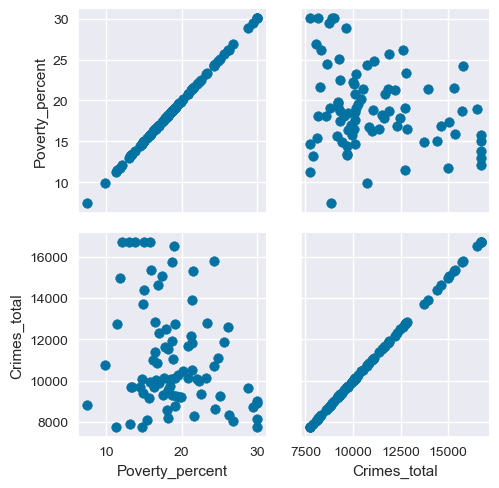

In [438]:
#Построим график зависимостей между следующими показателями:
gip_3 = model_df[['Poverty_percent', 'Сrimes_total']]
pg = sns.PairGrid(gip_3)
pg.map(plt.scatter)

**Вывод: не влияет**